In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from tqdm import tqdm
import cv2

print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.15.0


# **Loading the dataset from Kaggle**

To load a dataset from Kaggle into Google Colab, execute the following commands:

In [2]:
# Install kaggle package
! pip install -q kaggle
# Import files library for file upload
from google.colab import files
# Upload kaggle.json for API access, obtainable from your Kaggle account settings
files.upload()
# Create and set up .kaggle directory
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
# Load the dataset
!kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images

# List Kaggle datasets to confirm setup
##! kaggle datasets list

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images
License(s): ODbL-1.0
100% 34.0M/34.1M [00:01<00:00, 23.2MB/s]
100% 34.1M/34.1M [00:01<00:00, 19.5MB/s]


##Extract and clean up the Alzheimer's dataset zip file



In [3]:
# Extract and clean up the Alzheimer's dataset zip file
import zipfile
with zipfile.ZipFile('./alzheimers-dataset-4-class-of-images.zip', 'r') as zip_ref:
    #name of the unzip file
    zip_ref.extractall('./alzheimers-dataset-4-class-of-imagesr')
os.remove("./alzheimers-dataset-4-class-of-images.zip")

In [4]:
pwd

'/content'

## Checking the Dataset

In [5]:
# Walk through each directory in the /alzheimers-dataset-4-class-of-imagesr path
for dirname, _, filenames in os.walk('./alzheimers-dataset-4-class-of-imagesr'):
    # Initialize a counter for printed file paths
    printed_count = 0

    # Iterate over each file in the current directory
    for filename in filenames:
        # Print the full path of the file
        print(os.path.join(dirname, filename))
        # Increment the counter
        printed_count += 1

        # Check if we have printed two file paths
        if printed_count == 2:
            # Break out of the loop after printing two file paths
            break

./alzheimers-dataset-4-class-of-imagesr/Alzheimer_s Dataset/test/MildDemented/28 (8).jpg
./alzheimers-dataset-4-class-of-imagesr/Alzheimer_s Dataset/test/MildDemented/28 (23).jpg
./alzheimers-dataset-4-class-of-imagesr/Alzheimer_s Dataset/test/VeryMildDemented/31 (64).jpg
./alzheimers-dataset-4-class-of-imagesr/Alzheimer_s Dataset/test/VeryMildDemented/26 (58).jpg
./alzheimers-dataset-4-class-of-imagesr/Alzheimer_s Dataset/test/NonDemented/31 (82).jpg
./alzheimers-dataset-4-class-of-imagesr/Alzheimer_s Dataset/test/NonDemented/31 (90).jpg
./alzheimers-dataset-4-class-of-imagesr/Alzheimer_s Dataset/test/ModerateDemented/32.jpg
./alzheimers-dataset-4-class-of-imagesr/Alzheimer_s Dataset/test/ModerateDemented/28 (2).jpg
./alzheimers-dataset-4-class-of-imagesr/Alzheimer_s Dataset/train/MildDemented/mildDem497.jpg
./alzheimers-dataset-4-class-of-imagesr/Alzheimer_s Dataset/train/MildDemented/mildDem32.jpg
./alzheimers-dataset-4-class-of-imagesr/Alzheimer_s Dataset/train/VeryMildDemented/ver

In [6]:
images = []
labels = []
for folder in tqdm(os.listdir('./alzheimers-dataset-4-class-of-imagesr/Alzheimer_s Dataset')):
    folder_path = os.path.join('./alzheimers-dataset-4-class-of-imagesr/Alzheimer_s Dataset', folder)
    for subfolder in os.listdir(folder_path):
        subfolder_path=os.path.join(folder_path,subfolder)
        for image_filename in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, image_filename)
            images.append(image_path)
            labels.append(subfolder)
df = pd.DataFrame({'image': images, 'label': labels})
df

100%|██████████| 2/2 [00:00<00:00, 106.60it/s]


,image,label
0,./alzheimers-dataset-4-class-of-imagesr/Alzhei...,MildDemented
1,./alzheimers-dataset-4-class-of-imagesr/Alzhei...,MildDemented
2,./alzheimers-dataset-4-class-of-imagesr/Alzhei...,MildDemented
3,./alzheimers-dataset-4-class-of-imagesr/Alzhei...,MildDemented
4,./alzheimers-dataset-4-class-of-imagesr/Alzhei...,MildDemented
...,...,...
6395,./alzheimers-dataset-4-class-of-imagesr/Alzhei...,ModerateDemented
6396,./alzheimers-dataset-4-class-of-imagesr/Alzhei...,ModerateDemented
6397,./alzheimers-dataset-4-class-of-imagesr/Alzhei...,ModerateDemented
6398,./alzheimers-dataset-4-class-of-imagesr/Alzhei...,ModerateDemented


### Number of Samples per Class in DataFrame
This code generates a bar chart displaying the count of samples for each class within a DataFrame, utilizing Seaborn for an effective visual presentation.


<ipython-input-7-9a50992b2240>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df.label, palette='Set1')


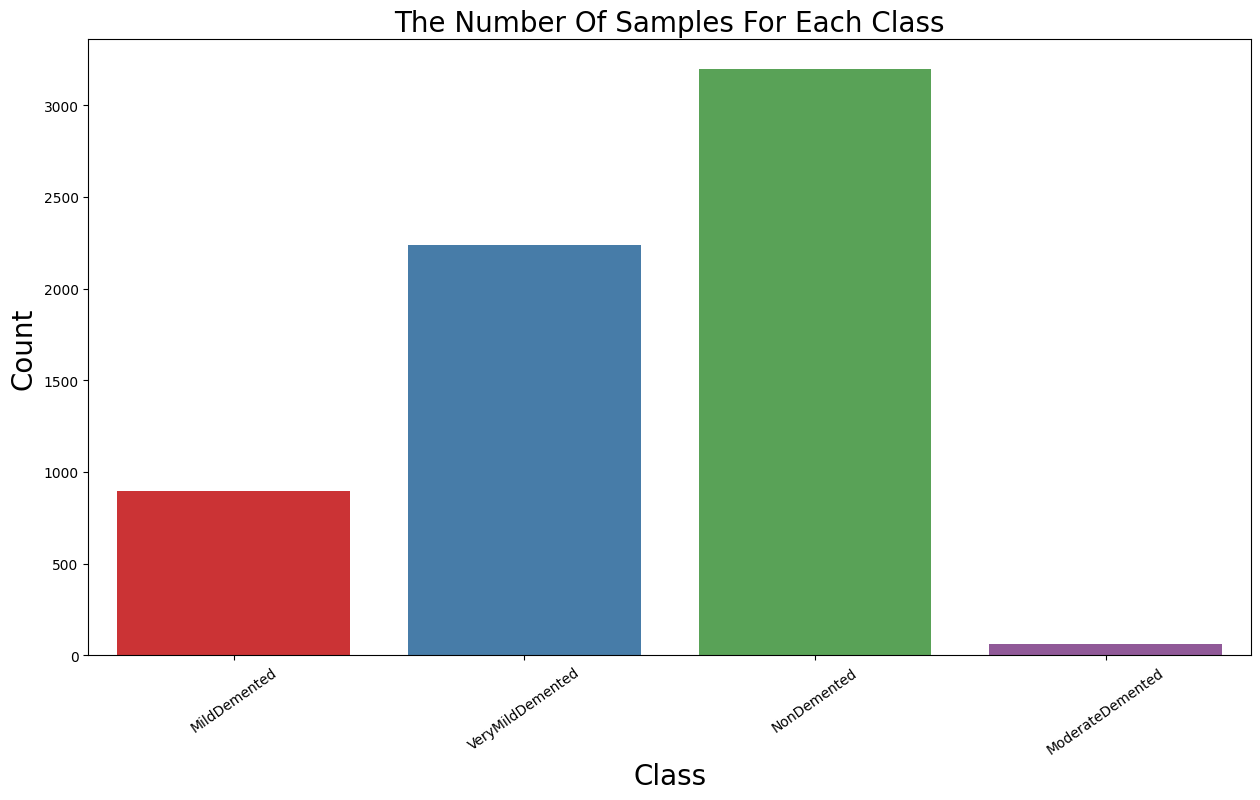

In [7]:
# Set figure size
plt.figure(figsize=(15, 8))

# Create and customize the bar chart

# Count the number of occurence of df.label on x
ax = sns.countplot(x=df.label, palette='Set1')
ax.set_xlabel("Class", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.title('The Number Of Samples For Each Class', fontsize=20)
plt.grid(False)
plt.xticks(rotation=35)

# Display the chart
plt.show()

### Image Batch Visualization
To gain insights into the nature of our dataset, it's essential to visualize the data itself. This code snippet facilitates such an understanding by displaying the first nine images from a training dataset, referred to as `df`. Each image is meticulously annotated with its corresponding class label, providing a clear and immediate representation of the data categories we are working with.

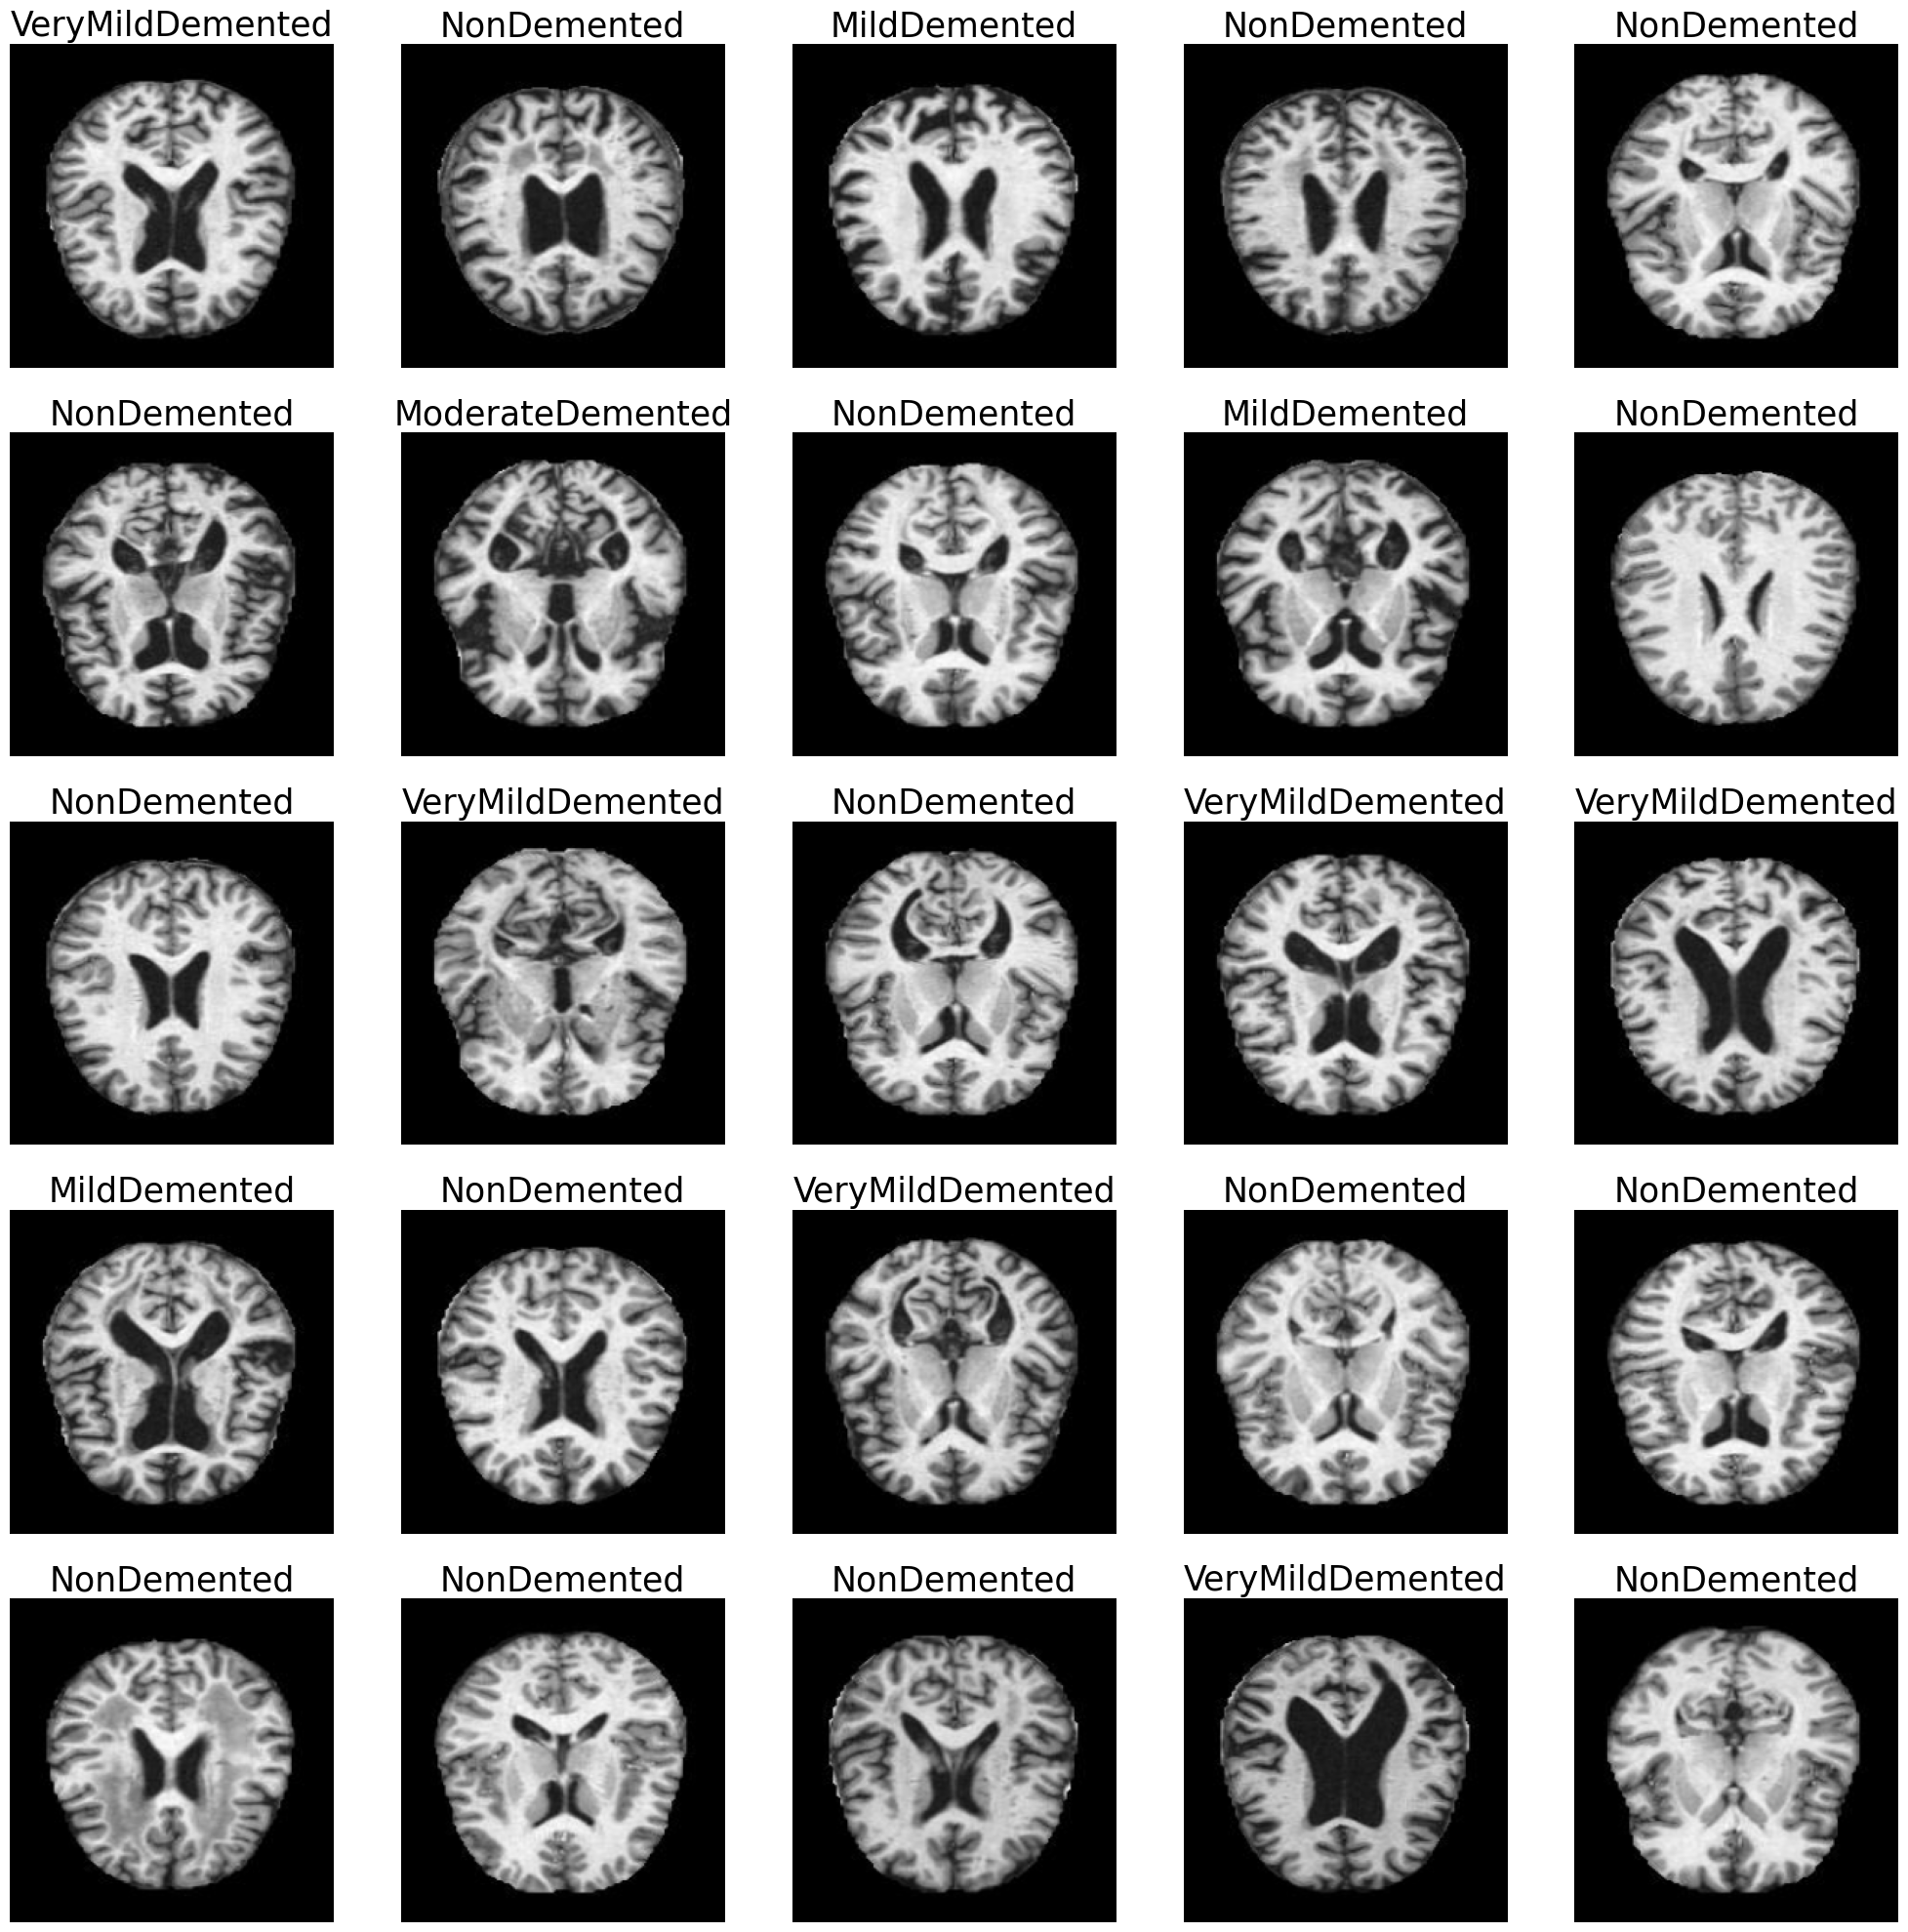

In [8]:
# Initialize a figure with a specified size to accommodate the large number of images
plt.figure(figsize=(25,25))

# Iterate over 50 random indices from the DataFrame
for n, i in enumerate(np.random.randint(0, len(df), 25)):
    # Create a subplot in a 5x5 grid for each image
    plt.subplot(5, 5, n+1)

    # Read the image from the path specified in the DataFrame
    img = cv2.imread(df.image[i])
    # Resize the image to 224x224 pixels for uniformity
    img = cv2.resize(img, (224, 224))
    # Convert the image from BGR to RGB color space for correct matplotlib display
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.axis('off')
    # Set the title of the subplot to the image's label, with an increased font size for readability
    plt.title(df.label[i], fontsize=25)

# Data processing

In [9]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync) # parralle training

Number of replicas: 1


The code aims to utilize a TPU for faster machine learning model training if available, falling back to CPU/GPU otherwise. It ensures compatibility across different environments and maximizes computational efficiency, particularly for large-scale models and datasets. Here's why each part of the code is important:

1. **TPU Detection and Configuration**: The attempt to configure a TPU (`TPUClusterResolver()`) is crucial for leveraging the high computational power of TPUs, which can significantly speed up the training of machine learning models, especially those with large datasets and complex neural network architectures. TPUs are designed to accelerate matrix calculations, which are a common operation in deep learning.

2. **Fallback Strategy**: The fallback to a default strategy (`get_strategy()`) ensures that the code remains versatile and can be executed in environments where a TPU is not available, without failing. This makes the code portable and flexible, able to run on different hardware configurations (e.g., local machines, different cloud environments) seamlessly.

3. **Distributed Training**: The use of a distribution strategy (`TPUStrategy` or the default strategy) is key for parallel training. It allows the model training to be distributed across multiple devices (TPU cores in the case of `TPUStrategy`), which can lead to faster training times by processing multiple batches of data simultaneously.

In [10]:
# TensorFlow will automatically optimize the number of threads for data loading
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Batch size is scaled by the number of devices available for training
BATCH_SIZE = 16 * strategy.num_replicas_in_sync

# Defines the size to which each image will be resized
IMAGE_SIZE = [176, 208]

# Number of training cycles
EPOCHS = 60

## Dataset Preparation

### Loading and Preprocessing
The dataset is prepared by resizing images to a uniform dimension, batching them for efficient processing, and splitting into training and validation subsets. This ensures the model can be trained effectively and evaluated accurately.

The function `tf.keras.preprocessing.image_dataset_from_directory` simplifies this step by implementing many features such as automatic label inference from directory structure, image resizing, batching, and splitting the dataset into training and validation subsets based on a specified validation split ratio.


In [11]:
class_names=['NonDemented', 'VeryMildDemented', 'MildDemented', 'ModerateDemented']

# Training dataset loading and preprocessing
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "./alzheimers-dataset-4-class-of-imagesr/Alzheimer_s Dataset/train",
    validation_split=0.2,  # Splits the dataset into training (80%) and validation (20%)
    subset="training",

    labels='inferred', # Automatically infer class labels from subdirectory names
    class_names=class_names,  # if None, automatically infer class names from the directory structure sorted in alphabetical order.
    label_mode='categorical',  # Labels are returned as a one-hot encoded format

    seed=1337,  # for reproducibility
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)

# Validation dataset loading and preprocessing
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "./alzheimers-dataset-4-class-of-imagesr/Alzheimer_s Dataset/train",
    validation_split=0.2,
    subset="validation",
    class_names=class_names,
    labels='inferred',
    label_mode='categorical',
    seed=1337,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)

Found 5121 files belonging to 4 classes.
Using 4097 files for training.
Found 5121 files belonging to 4 classes.
Using 1024 files for validation.


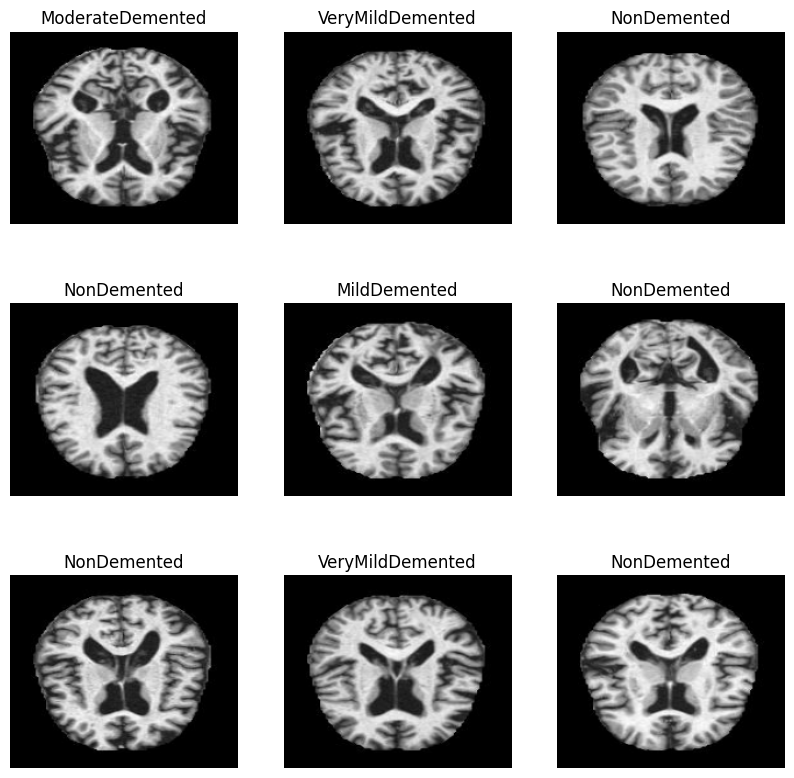

In [12]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        # Find the index of the True value in the one-hot encoded array
        label_index = np.argmax(labels[i])
        plt.title(train_ds.class_names[label_index])

        plt.axis("off")

In [13]:
#To optimize data loading, apply .cache() and .prefetch(buffer_size=AUTOTUNE).
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

1. **`.cache()`**: This method caches the dataset elements after their first load from the disk. This means that in subsequent epochs of training, the model can access the data faster than if it had to reload them from the disk. This is particularly beneficial if your dataset fits in memory, as it can significantly reduce training time.

2. **`.prefetch(buffer_size=AUTOTUNE)`**: This method allows the dataset to preload the data for the next batch while the model is working on the current batch. This can enhance the utilization of the GPU or CPU by reducing idle time between epochs. `AUTOTUNE` enables TensorFlow to automatically determine the optimal prefetch buffer size based on resource availability.

In [14]:
#In TensorFlow, datasets created using tf.data.Dataset do not have a .shape()
for element in train_ds.take(1):
    print(element[0].shape, element[1].shape)

(16, 176, 208, 3) (16, 4)


`train_ds` dataset is structured to provide batches of 16 images, each with a dimension of 176x208 pixels and 3 color channels, along with a corresponding batch of 16 labels, each being a vector of length 4. This structure is typical for supervised learning tasks involving image data, where you're classifying images into multiple categories.

# CNN Model Architecture

Convolutional Neural Networks (CNNs) are a class of deep neural networks highly effective for tasks related to image processing, computer vision, and more. They are specifically designed to automatically and adaptively learn spatial hierarchies of features from input images.

In [15]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models, callbacks

## Building Blocks for CNN

In [16]:
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ]
    )

    return block

def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])

    return block

### Explanation of Model Building Blocks


### Convolutional Block (`conv_block`)

The `conv_block` function is designed to create a reusable convolutional block that can be easily integrated into convolutional neural network (CNN) architectures. This block includes the following components:

- **Separable Convolution Layers (`SeparableConv2D`)**: Two layers utilize separable convolution, a technique that first performs a spatial convolution per channel followed by a pointwise convolution. This method reduces the number of parameters and computational cost compared to standard convolution(`layers.Conv2D`), while effectively capturing spatial features and relationships between channels. Each layer has a specified number of filters provided by the `filters` argument and uses the ReLU activation function to introduce non-linearities.

- **Batch Normalization (`BatchNormalization`)**: Following the convolutions, this layer normalizes the activations of the previous layer for each batch, thereby speeding up the convergence of the network and stabilizing the learning process.

- **Max Pooling (`MaxPool2D`)**: Comes after batch normalization and reduces the spatial dimensionality of the input features, allowing the model to focus on the most significant features and reduce overfitting.

### Dense Block (`dense_block`)

The `dense_block` function creates a dense block, also intended to be reused in different parts of a model. This block contains:

- **Dense Layer (`Dense`)**: A fully connected layer with a specified number of units (`units`) and ReLU activation. It enables the network to learn complex relationships between its input features.

- **Batch Normalization (`BatchNormalization`)**: As in the `conv_block`, it normalizes the activations, helping to maintain a stable distribution of activations across the network and to accelerate learning.

- **Dropout (`Dropout`)**: This layer randomly sets a fraction of input units to 0 at each update during training time, specified by `dropout_rate`, which helps prevent overfitting by ensuring that the network does not rely too heavily on any single node.

These building blocks, `conv_block` and `dense_block`, are designed to simplify the construction of complex CNN architectures by encapsulating common patterns of layers and operations, promoting code reuse, and making the model architecture more modular and easier to understand and modify.

---

The most conventional metric to use is probably accuracy. Accuracy, however, cannot be used for imbalanced datasets. Let's check how many images are in each class for our training data.


In [50]:
NUM_CLASSES = len(class_names)
NUM_IMAGES = []

for label in class_names:
    dir_name = os.path.join("./alzheimers-dataset-4-class-of-imagesr/Alzheimer_s Dataset/train", label)
    NUM_IMAGES.append(len([name for name in os.listdir(dir_name)]))
print("Number of category:",NUM_CLASSES)
print("Name of the category:",class_names)
print("Number of picture in each category:",NUM_IMAGES)

Number of category: 4
Name of the category: ['NonDemented', 'VeryMildDemented', 'MildDemented', 'ModerateDemented']
Number of picture in each category: [2560, 1792, 717, 52]


## CNN model

In [51]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(*IMAGE_SIZE, 3)),

        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),

        conv_block(32),
        conv_block(64),

        conv_block(128),
        tf.keras.layers.Dropout(0.2),

        conv_block(256),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),

        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ],name = "cnn_model")

    return model

1. **Input Layer**: The model starts with an input layer that specifies the shape of the input images. `(*IMAGE_SIZE, 3)` indicates that the input will be images of height and width specified by `IMAGE_SIZE` and 3 color channels (RGB).

2. **Initial Convolutional Layers**: Two convolutional layers with 16 filters each, a kernel size of 3x3, ReLU activation, and 'same' padding are applied. These layers are designed to extract low-level features from the input image, such as edges and textures. The 'same' padding ensures the output feature maps have the same spatial dimensions as the input.

3. **Max Pooling Layer**: A max pooling layer follows, which reduces the spatial dimensions (height and width) of the feature maps by half. This operation helps to make the model more abstract and invariant to small changes in the input image.

4. **Convolutional Blocks**: The model then uses predefined `conv_block` functions with increasing numbers of filters (32, 64, 128, and 256). Each `conv_block` includes separable convolutional layers, batch normalization, and max pooling, which together enhance the model's ability to learn more complex and high-level features from the input images. The separable convolutions reduce the computational cost while maintaining the model's effectiveness.

5. **Dropout Layers**: Dropout layers with a rate of 0.2 are applied after some of the convolutional blocks to reduce overfitting. Dropout works by randomly setting a fraction of the input units to 0 at each update during training, which helps prevent the model from becoming too dependent on any single pattern.

6. **Flatten Layer**: A flatten layer is used to convert the 3D feature maps to 1D feature vectors, making them suitable for feeding into dense layers.

7. **Dense Blocks**: The model includes dense blocks with 512, 128, and 64 units, respectively, each followed by batch normalization and dropout. These blocks allow the model to learn non-linear combinations of the high-level features extracted by the convolutional layers. The dropout rates (0.7, 0.5, and 0.3) increase as the model gets deeper to combat overfitting effectively.

8. **Output Layer**: Finally, a dense layer with a number of units equal to `NUM_CLASSES` and a softmax activation function is used to output the probabilities of each class. The softmax function ensures that the output values are in the range [0, 1] and sum up to 1, making them interpretable as class probabilities.

The model returned by `build_model` is suitable for training on a dataset of images to perform classification tasks, with its architecture designed to progressively extract more complex features and reduce overfitting.

### Optimizers and metrics

In [52]:
with strategy.scope():
    model = build_model()

    METRICS = [tf.keras.metrics.AUC(name='auc')]

    model.compile(
        optimizer='adam',
        loss=tf.losses.CategoricalCrossentropy(),
        metrics=METRICS
    )

For an imbalanced dataset, we want to  use the ROC AUC score as our evaluation metric. Unlike accuracy, the ROC AUC score provides a nuanced measure of a model's ability to distinguish between classes:

- **Scores close to 1** indicate excellent model performance in differentiating classes.
- **A score of 0.5** suggests the model performs no better than random guessing.
- **Scores near 0** imply poor model performance, though such scores are rare in binary classification.

The ROC AUC is particularly valuable in imbalanced datasets, offering insight into the model's discriminative power beyond mere accuracy.

---

*    Adam Optimizer

Adam (Adaptive Moment Estimation) is an optimization algorithm used for training deep learning models. It combines the best properties of the AdaGrad and RMSProp algorithms to handle sparse gradients on noisy problems. Adam is popular due to its effective use of adaptive learning rates for different parameters. Key features include:

- **Adaptive Learning Rates**: Adam maintains a learning rate for each parameter, adjusting them individually based on the estimates of the first and second moments of the gradients (essentially, the mean and the uncentered variance).
- **Efficiency**: It is computationally efficient, requiring minimal memory, and is well suited for problems with large datasets or parameters.
- **Robustness**: Adam performs well in practice for a wide range of non-convex optimization problems, making it a go-to optimizer for many deep learning tasks.


*   Categorical Crossentropy

Categorical Crossentropy is a loss function often used in multi-class classification problems where each example belongs to one of L classes. The goal is to predict a probability distribution over these classes. This loss function compares the predicted probability distribution with the true distribution, where the true distribution is represented as a one-hot encoded vector. Key aspects include:

- **Mathematical Formulation**: For a single sample with true distribution \(y\) and predicted distribution \(\hat{y}\), the categorical crossentropy loss is defined as \(L(y, \hat{y}) = -\sum_{i} y_i \log(\hat{y}_i)\), where the sum is over the classes.
- **Usage**: It's used when the labels are one-hot encoded, meaning each label is a vector where all elements are 0 except for the true class, which is 1.
- **Purpose**: Minimizing this loss pushes the model to output a probability distribution that closely matches the true distribution, effectively improving the model's classification accuracy.

In summary, Adam provides an efficient and effective optimization strategy for training deep learning models, while Categorical Crossentropy serves as a crucial loss function for guiding models in multi-class classification tasks towards accurate predictions.

We are implementing several more functions to increase the global performance of our `model`:

* Exponential decay adjusts the learning rate at each epoch, reducing it by a
factor based on the epoch number. This approach can help in stabilizing the training process and potentially lead to better model performance by fine-tuning the learning rate over time.
* Callbacks for saving the best model, and early stopping to prevent overfitting.


In [22]:
def exponential_decay(lr0, s):
    """
    Parameters:
    - lr0: Initial learning rate.
    - s: Decay rate. The learning rate is reduced every 's' epochs.

    Returns:
    A function that takes an epoch index (integer) as input and returns the adjusted learning rate.
    """
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 ** (epoch / s)
    return exponential_decay_fn

# Initialize the exponential decay function with an initial learning rate and decay step.
exponential_decay_fn = exponential_decay(0.01, 20)

# LearningRateScheduler callback to adjust the learning rate during training.
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

# ModelCheckpoint callback to save the model with the best validation accuracy.
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("alzheimer_model.h5", save_best_only=True)

# EarlyStopping callback to stop training when the validation accuracy stops improving.
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

### Model Summary

In [20]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 176, 208, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 208, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 88, 104, 16)       0         
 D)                                                              
                                                                 
 sequential (Sequential)     (None, 44, 52, 32)        2160      
                                                                 
 sequential_1 (Sequential)   (None, 22, 26, 64)        7392      
                                                                 
 sequential_2 (Sequential)   (None, 11, 13, 128)       27072     
                                                      

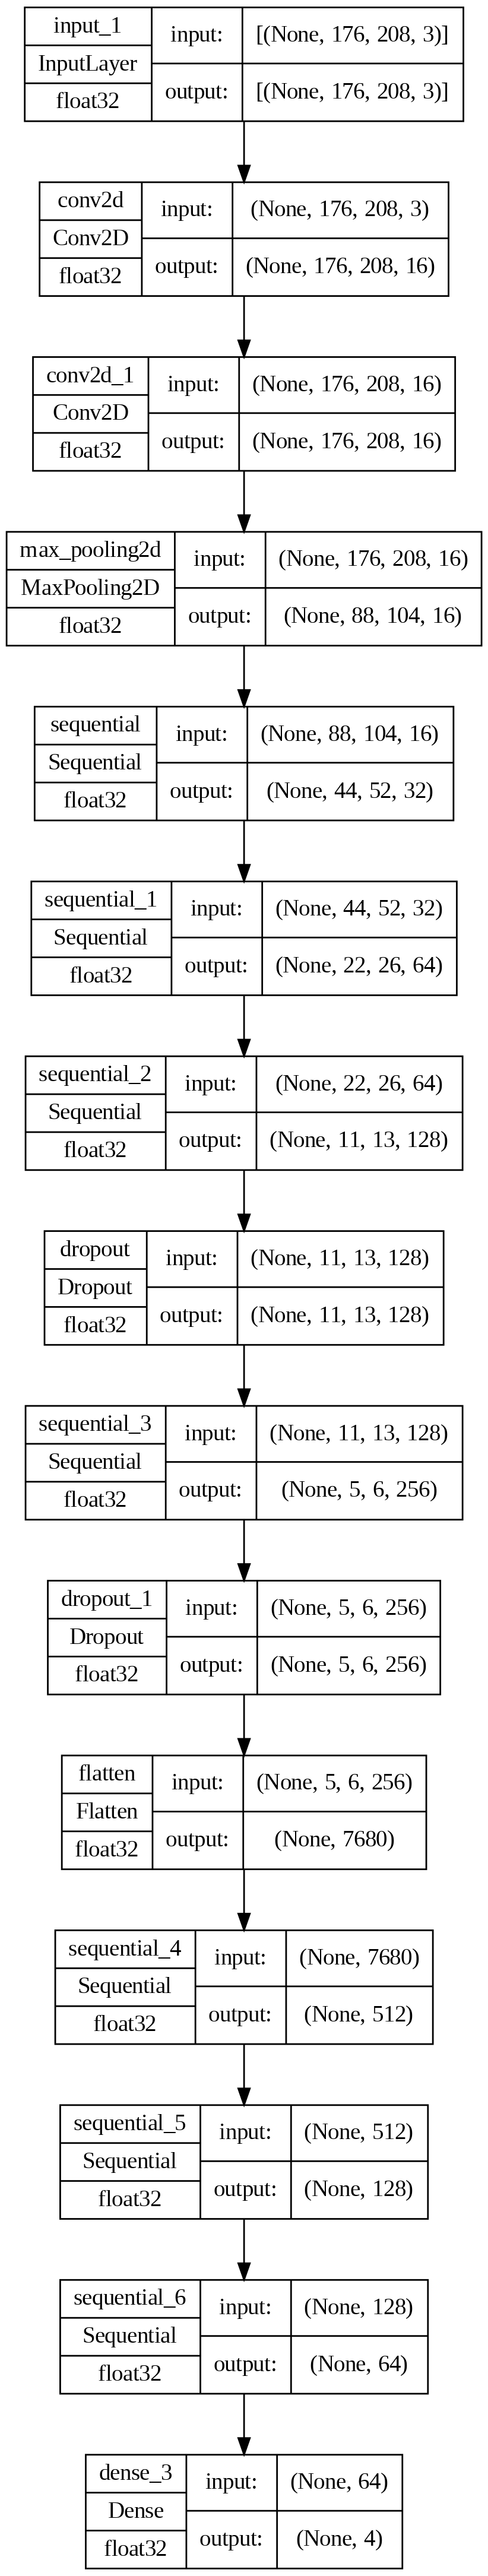

In [21]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    show_dtype=True,
    dpi=200
    )

# Trainning the Alzheimer_CNN_Model


In [23]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    callbacks=[checkpoint_cb, early_stopping_cb, lr_scheduler],
    epochs= 60 #EPOCHS
)

Epoch 1/60
257/257 [==============================] - ETA: 0s - loss: 1.1185 - auc: 0.7742

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


257/257 [==============================] - 30s 51ms/step - loss: 1.1185 - auc: 0.7742 - val_loss: 1.1157 - val_auc: 0.7132 - lr: 0.0100
Epoch 2/60
257/257 [==============================] - 11s 41ms/step - loss: 0.9745 - auc: 0.8126 - val_loss: 6.9677 - val_auc: 0.6777 - lr: 0.0089
Epoch 3/60
257/257 [==============================] - 11s 41ms/step - loss: 0.9567 - auc: 0.8189 - val_loss: 2.0015 - val_auc: 0.7684 - lr: 0.0079
Epoch 4/60
257/257 [==============================] - 11s 42ms/step - loss: 0.9572 - auc: 0.8187 - val_loss: 8.0873 - val_auc: 0.6737 - lr: 0.0071
Epoch 5/60
257/257 [==============================] - 11s 42ms/step - loss: 0.9329 - auc: 0.8284 - val_loss: 1.0788 - val_auc: 0.7798 - lr: 0.0063
Epoch 6/60
257/257 [==============================] - 11s 42ms/step - loss: 0.9292 - auc: 0.8315 - val_loss: 1.0499 - val_auc: 0.7538 - lr: 0.0056
Epoch 7/60
257/257 [==============================] - 11s 42ms/step - loss: 0.9179 - auc: 0.8368 - val_loss: 2.0649 - val_auc: 0.

The model demonstrates good performance with high AUC scores on both training (0.9214) and validation (0.9138) sets, indicating strong class differentiation ability. The slight increase in validation loss (0.6882) compared to training loss (0.6537) suggests minimal overfitting. The low learning rate (1.1220e-05) implies fine-tuning in the final training stages. Overall, the model generalizes well, with potential for minor improvements to optimize further. We can think of data augmentation to improve the quality of the model.


## Plotting the trend of the metrics during training

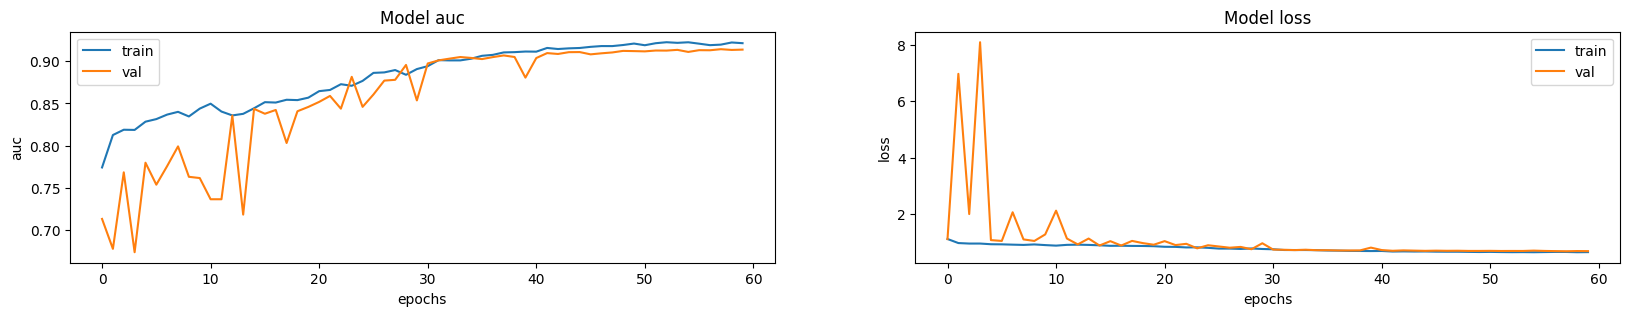

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['auc', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [26]:
cnn_model = models.load_model('alzheimer_model.h5')
cnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 176, 208, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 208, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 88, 104, 16)       0         
 D)                                                              
                                                                 
 sequential (Sequential)     (None, 44, 52, 32)        2160      
                                                                 
 sequential_1 (Sequential)   (None, 22, 26, 64)        7392      
                                                                 
 sequential_2 (Sequential)   (None, 11, 13, 128)       27072     
                                                      

# Testing the model

In [48]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "./alzheimers-dataset-4-class-of-imagesr/Alzheimer_s Dataset/test",
    color_mode='rgb',
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    class_names=class_names,
    shuffle = True,

)

test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 1279 files belonging to 4 classes.


In [49]:
_ = model.evaluate(test_ds)

80/80 [==============================] - 1s 14ms/step - loss: 0.9391 - auc: 0.8565
